In [1]:
library(tidyverse)
library(lme4)
library(lmerTest)

Warning message:
"package 'tidyverse' was built under R version 3.6.3"-- Attaching packages ------------------------------------------------------------------------------- tidyverse 1.3.0 --
v ggplot2 3.3.3     v purrr   0.3.4
v tibble  3.0.4     v dplyr   1.0.2
v tidyr   1.1.2     v stringr 1.4.0
v readr   1.3.1     v forcats 0.4.0
Warning message:
"package 'ggplot2' was built under R version 3.6.3"Warning message:
"package 'tibble' was built under R version 3.6.3"Warning message:
"package 'tidyr' was built under R version 3.6.3"Warning message:
"package 'purrr' was built under R version 3.6.3"Warning message:
"package 'dplyr' was built under R version 3.6.3"-- Conflicts ---------------------------------------------------------------------------------- tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
Warning message:
"package 'lme4' was built under R version 3.6.3"Loading required package: Matrix

Attaching package: 'Matrix'

The fo

In [71]:
data <- read.csv('F:/Projects/PAE_PlaceCell/analysis/ripple_modulation/post_processed/df_prop.csv')
summary(data)

       X            n_pyr        n_pyr_pass       n_int        n_int_pass    
 Min.   : 0.0   Min.   : 4.0   Min.   : 0.0   Min.   : 0.0   Min.   : 0.000  
 1st Qu.:23.5   1st Qu.:24.0   1st Qu.: 4.0   1st Qu.: 9.5   1st Qu.: 1.000  
 Median :47.0   Median :36.0   Median : 8.0   Median :17.0   Median : 2.000  
 Mean   :47.0   Mean   :38.6   Mean   :12.8   Mean   :17.4   Mean   : 4.158  
 3rd Qu.:70.5   3rd Qu.:49.5   3rd Qu.:18.0   3rd Qu.:26.0   3rd Qu.: 5.000  
 Max.   :94.0   Max.   :92.0   Max.   :78.0   Max.   :45.0   Max.   :21.000  
                                                                             
  area                       session       group         rat    
 ca1:27   LEM3124_S20190307163732: 2   control:33   LEM3124:28  
 ca3:68   LEM3124_S20190309145324: 2   pae    :62   LEM3216:21  
          LEM3124_S20190315160017: 2                LEM3246:17  
          LEM3124_S20190319154019: 2                LEM3206:15  
          LEM3124_S20190322123145: 2               

In [72]:
data$groupup = factor(data$group, levels=c('control', 'pae'))
data$rat = factor(data$rat)
data$session = factor(data$session)
data$area = factor(data$area, levels=c('ca1', 'ca3'))

In [73]:
xtabs(~group+rat+area,data=data)

, , area = ca1

         rat
group     LEM3116 LEM3120 LEM3124 LEM3206 LEM3216 LEM3246 LS19 LS23
  control       2       1       0       0       5       0    0    1
  pae           0       0      16       0       0       0    2    0

, , area = ca3

         rat
group     LEM3116 LEM3120 LEM3124 LEM3206 LEM3216 LEM3246 LS19 LS23
  control       7       1       0       0      16       0    0    0
  pae           0       0      12      15       0      17    0    0


In [46]:
data

X,n_pyr,n_pyr_pass,n_int,n_int_pass,area,session,group,rat,groupup
0,83,56,24,16,ca1,LEM3116_S20180717110938,control,LEM3116,control
1,20,6,0,0,ca1,LEM3116_S20180718184628,control,LEM3116,control
2,51,10,8,0,ca3,LEM3116_S20180802100324,control,LEM3116,control
3,51,8,11,0,ca3,LEM3116_S20180803103321,control,LEM3116,control
4,55,13,18,1,ca3,LEM3116_S20180806104145,control,LEM3116,control
5,48,10,12,1,ca3,LEM3116_S20180807105247,control,LEM3116,control
6,69,6,15,0,ca3,LEM3116_S20180808160117,control,LEM3116,control
7,63,19,21,3,ca3,LEM3116_S20180814141527,control,LEM3116,control
8,66,26,16,6,ca3,LEM3116_S20180817153256,control,LEM3116,control
9,40,31,17,6,ca1,LEM3120_S20181007151036,control,LEM3120,control


In [74]:
# hist(data[data$area=='ca1',]$n_pyr_pass / data[data$area=='ca1',]$n_pyr)

# data[data$area=='ca1',]$n_pyr_pass / data[data$area=='ca1',]$n_pyr
data$prop_pyr = data$n_pyr_pass / data$n_pyr
# data$prop_pyr[is.nan(data$prop_pyr)] = 0


data$prop_int = data$n_int_pass / data$n_int
# data$prop_int[is.nan(data$prop_int)] = 0

# data$prop_pyr_log = log(data$prop_pyr)

# hist(data$prop_pyr)
# hist(data$prop_pyr_log)
# data$prop_pyr == 

# data$prop_pyr_log[is.nan(data$prop_pyr_log)] = 0
# data$prop_pyr_log[is.infinite(data$prop_pyr_log)] = 0




# CA1 pyramidal cells

In [23]:
overdisp.glmer <- function(model) {
  ## From http://glmm.wikidot.com/faq
  ## number of variance parameters in 
  ##   an n-by-n variance-covariance matrix
  vpars <- function(m) {
    nrow(m)*(nrow(m)+1)/2
  }
  model.df <- sum(sapply(lme4::VarCorr(model),vpars))+length(lme4::fixef(model))
  rdf <- nrow(model.frame(model))-model.df
  rp <- residuals(model)
  dev <- sum(rp^2)
  prat <- dev/rdf
  cat(paste("Residual deviance: ",round(dev,3)," on ",rdf," degrees of freedom",
    " (ratio: ",round(prat,3),")\n",sep=""))
}

[1] 0.7037037

[1] 0.125

[1] 0.7037037

[1] 0.125

boundary (singular) fit: see ?isSingular


,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
m1.null,3,172.8709,176.7584,-83.43547,166.8709,NA,NA,NA
m1,4,169.1097,174.2930,-80.55485,161.1097,5.761241,1,0.0163835


Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: prop_pyr ~ group + (1 | rat/session)
   Data: data[data$area == "ca1", ]
Weights: n_pyr

     AIC      BIC   logLik deviance df.resid 
   169.1    174.3    -80.6    161.1       23 

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-1.16640 -0.40207  0.05698  0.25063  0.69879 

Random effects:
 Groups      Name        Variance  Std.Dev. 
 session:rat (Intercept) 9.233e-01 9.609e-01
 rat         (Intercept) 5.210e-10 2.283e-05
Number of obs: 27, groups:  session:rat, 27; rat, 6

Fixed effects:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)   0.5472     0.3530   1.550    0.121    
grouppae     -2.6124     0.4378  -5.967 2.41e-09 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
         (Intr)
grouppae -0.801
optimizer (Nelder_Mead) convergence code: 0 (OK)
boundary (singula

Residual deviance: 7.769 on 23 degrees of freedom (ratio: 0.338)


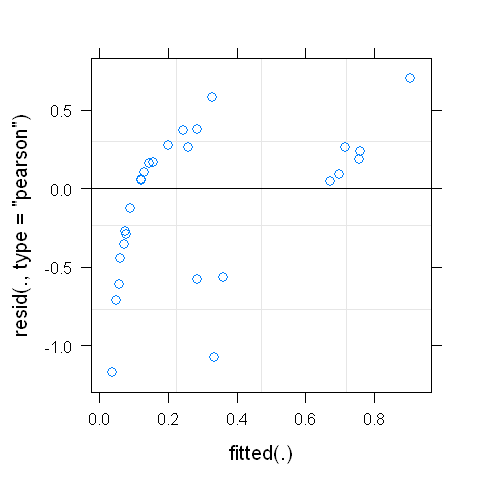

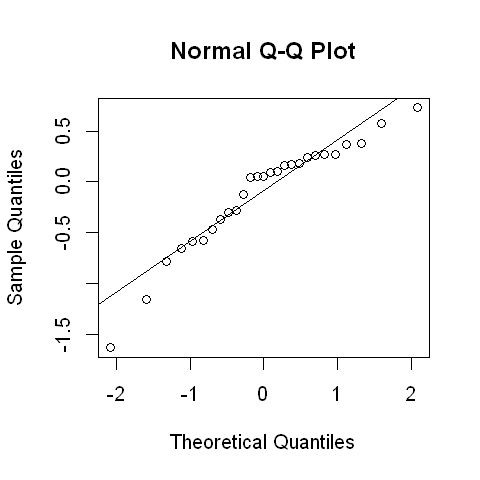

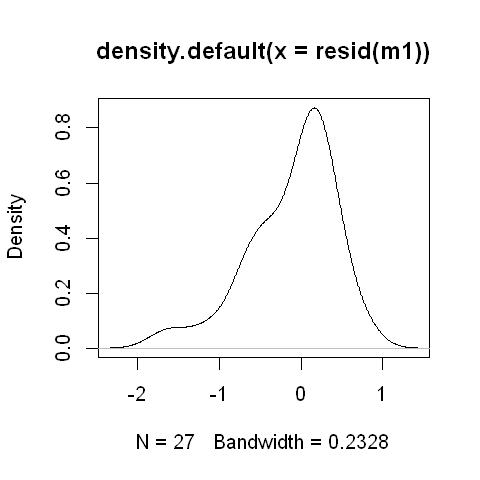

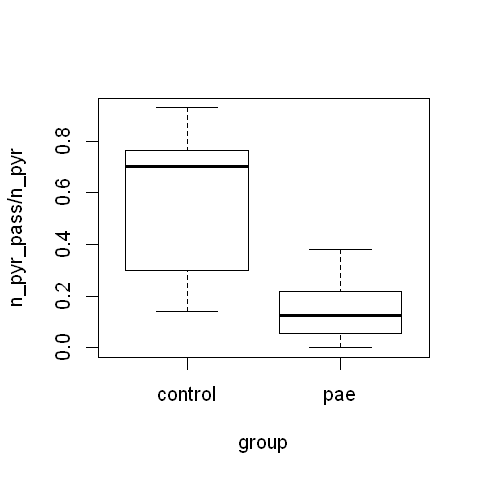

In [76]:
median(data[data$area=='ca1' & data$group=='control',]$prop_pyr)
median(data[data$area=='ca1' & data$group=='pae',]$prop_pyr)

m1 = glmer(prop_pyr ~ group + (1|rat/session), weights=n_pyr, data=data[data$area=='ca1',],family="binomial")
m1.null = glmer(prop_pyr ~ 1 + (1|rat/session), weights=n_pyr, data=data[data$area=='ca1',],family="binomial")

anova(m1.null, m1)  

summary(m1)
overdisp.glmer(m1)

options(repr.plot.width = 4, repr.plot.height = 4)

plot(m1)
qqnorm(resid(m1))
qqline(resid(m1))
plot(density(resid(m1)))

plot(n_pyr_pass/n_pyr ~ group, data = data[data$area == "ca1",])



# CA1 interneurons

[1] 0.4072398

[1] 0.09090909

boundary (singular) fit: see ?isSingular


,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
m1.null,3,123.2795,127.0538,-58.63975,117.2795,NA,NA,NA
m1,4,117.0578,122.0902,-54.52890,109.0578,8.221691,1,0.004139262


Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: n_int_pass/n_int ~ group + (1 | rat/session)
   Data: data[data$area == "ca1", ]
Weights: n_int

     AIC      BIC   logLik deviance df.resid 
   117.1    122.1    -54.5    109.1       22 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.0687 -0.5848  0.0616  0.2484  1.0337 

Random effects:
 Groups      Name        Variance Std.Dev.
 session:rat (Intercept) 0.9749   0.9874  
 rat         (Intercept) 0.0000   0.0000  
Number of obs: 26, groups:  session:rat, 26; rat, 6

Fixed effects:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -0.5699     0.4352  -1.310 0.190361    
grouppae     -1.8531     0.5415  -3.422 0.000621 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
         (Intr)
grouppae -0.794
optimizer (Nelder_Mead) convergence code: 0 (OK)
boundary (singular) fit: 

Residual deviance: 13.117 on 22 degrees of freedom (ratio: 0.596)


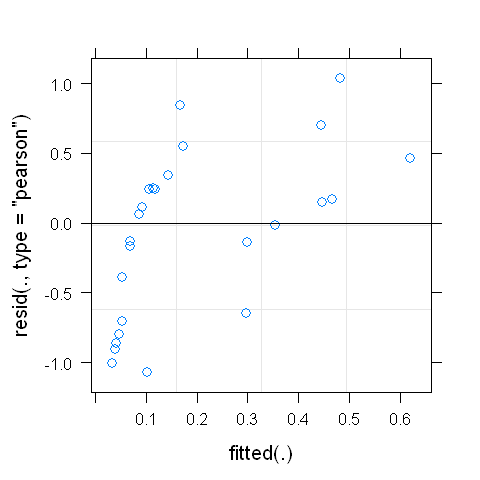

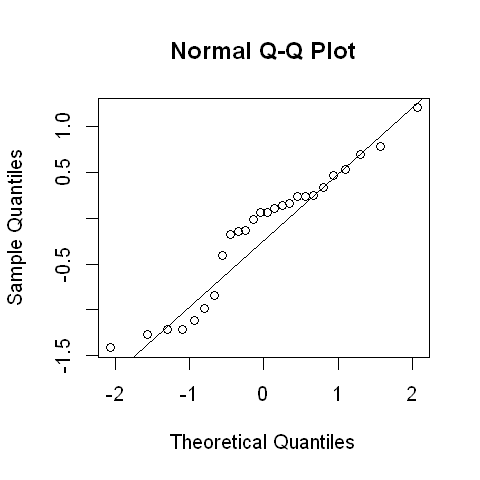

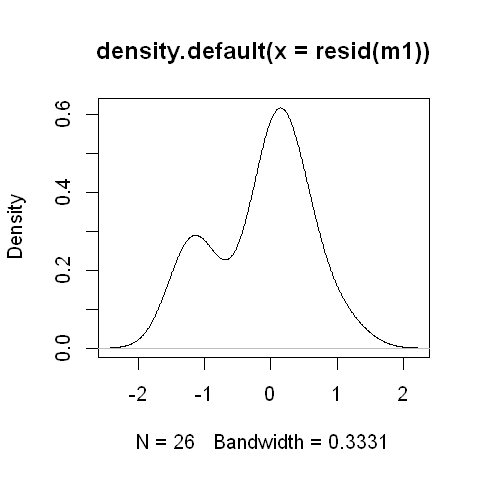

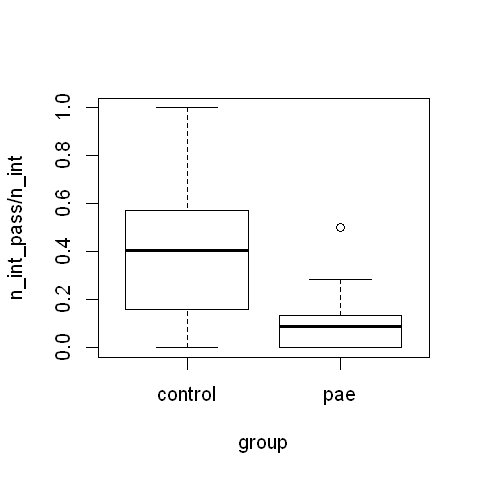

In [81]:
median(data[data$area=='ca1' & data$group=='control',]$prop_int,na.rm = TRUE)
median(data[data$area=='ca1' & data$group=='pae',]$prop_int,na.rm = TRUE)

m1 = glmer(n_int_pass/n_int ~ group + (1|rat/session), weights=n_int, data=data[data$area=='ca1',], family="binomial")
m1.null = glmer(n_int_pass/n_int ~ 1 + (1|rat/session), weights=n_int, data=data[data$area=='ca1',], family="binomial")

anova(m1.null, m1)  

summary(m1)
overdisp.glmer(m1)

options(repr.plot.width = 4, repr.plot.height = 4)

plot(m1)
qqnorm(resid(m1))
qqline(resid(m1))
plot(density(resid(m1)))

plot(n_int_pass/n_int ~ group, data = data[data$area == "ca1",])


# CA3 pyramidal cells

[1] 0.6148148

[1] 0.2460947

,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
m1.null,3,405.9053,412.5638,-199.9526,399.9053,NA,NA,NA
m1,4,406.6406,415.5186,-199.3203,398.6406,1.264687,1,0.2607658


Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: prop_pyr ~ group + (1 | rat/session)
   Data: data[data$area == "ca3", ]
Weights: n_pyr

     AIC      BIC   logLik deviance df.resid 
   406.6    415.5   -199.3    398.6       64 

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-1.25605 -0.33840 -0.08589  0.30578  1.57975 

Random effects:
 Groups      Name        Variance Std.Dev.
 session:rat (Intercept) 0.4326   0.6577  
 rat         (Intercept) 0.8693   0.9324  
Number of obs: 68, groups:  session:rat, 68; rat, 6

Fixed effects:
            Estimate Std. Error z value Pr(>|z|)
(Intercept)  -0.3622     0.5943  -0.610    0.542
grouppae     -0.9706     0.8116  -1.196    0.232

Correlation of Fixed Effects:
         (Intr)
grouppae -0.732

Residual deviance: 23.223 on 64 degrees of freedom (ratio: 0.363)


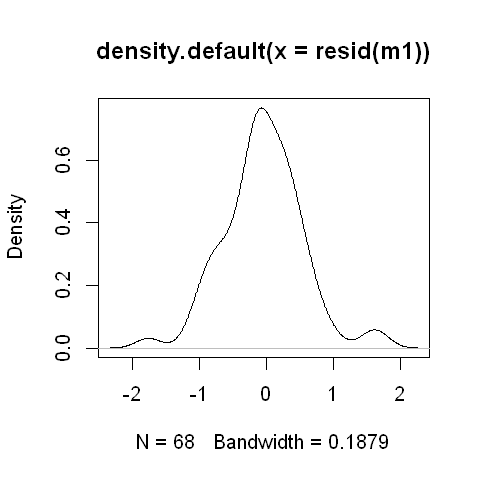

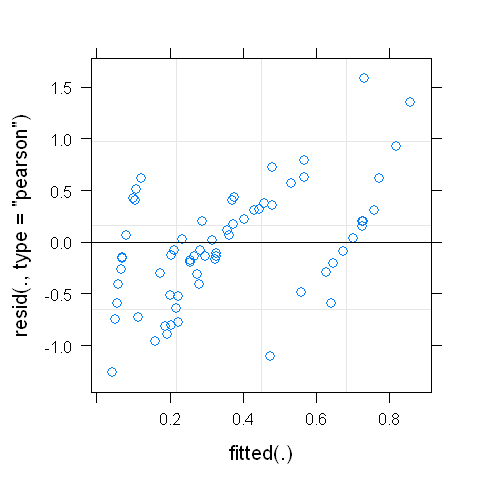

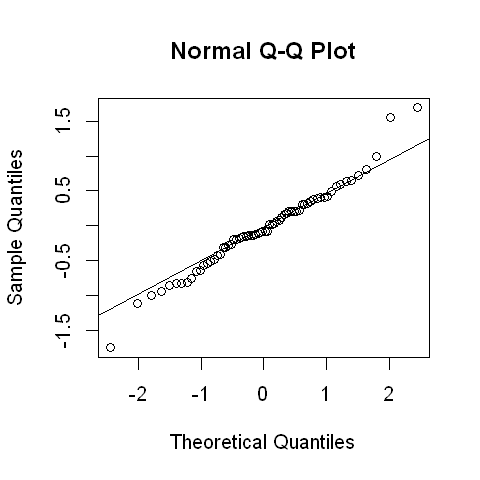

In [82]:
median(data[data$area=='ca3' & data$group=='control',]$prop_pyr)
median(data[data$area=='ca3' & data$group=='pae',]$prop_pyr)

m1 = glmer(prop_pyr ~ group + (1|rat/session), weights=n_pyr, data=data[data$area=='ca3',], family="binomial")
m1.null = glmer(prop_pyr ~ 1 + (1|rat/session), weights=n_pyr, data=data[data$area=='ca3',], family="binomial")

anova(m1.null, m1)  

summary(m1)
overdisp.glmer(m1)

plot(density(resid(m1)))

options(repr.plot.width = 4, repr.plot.height = 4)

plot(m1)
qqnorm(resid(m1))
qqline(resid(m1))

# CA3 interneurons

[1] 0.375

[1] 0.2

,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
m1.null,3,281.9122,288.3416,-137.9561,275.9122,NA,NA,NA
m1,4,283.8904,292.4630,-137.9452,275.8904,0.02180036,1,0.8826194


Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: prop_int ~ group + (1 | rat/session)
   Data: data[data$area == "ca3", ]
Weights: n_int

     AIC      BIC   logLik deviance df.resid 
   283.9    292.5   -137.9    275.9       59 

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-1.17676 -0.48711 -0.09374  0.40709  1.12450 

Random effects:
 Groups      Name        Variance Std.Dev.
 session:rat (Intercept) 0.5461   0.739   
 rat         (Intercept) 1.2950   1.138   
Number of obs: 63, groups:  session:rat, 63; rat, 6

Fixed effects:
            Estimate Std. Error z value Pr(>|z|)  
(Intercept)  -1.2933     0.7708  -1.678   0.0934 .
grouppae     -0.1532     1.0236  -0.150   0.8810  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
         (Intr)
grouppae -0.752

Residual deviance: 36.457 on 59 degrees of freedom (ratio: 0.618)


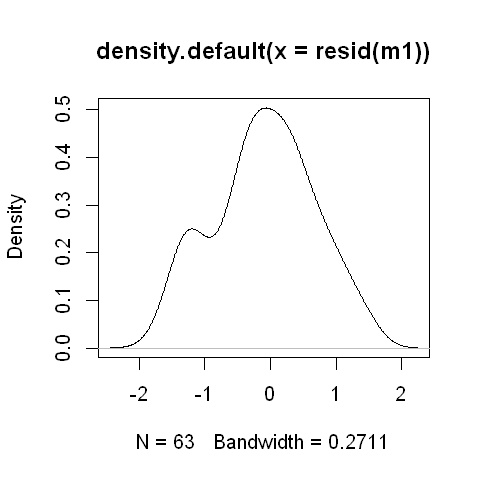

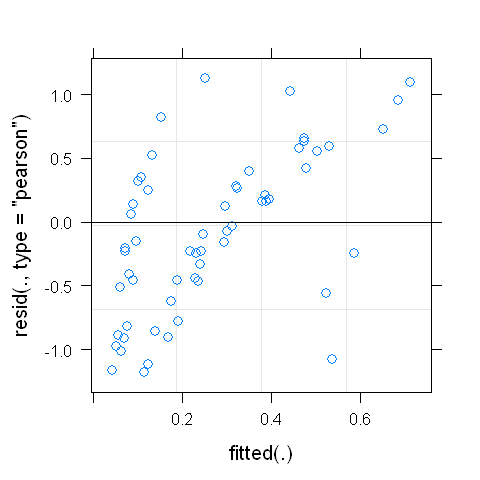

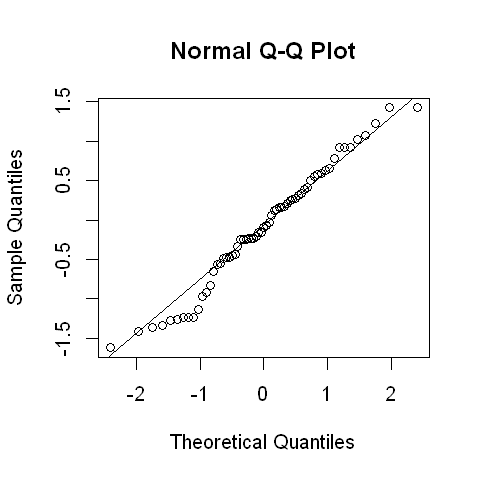

In [84]:
median(data[data$area=='ca3' & data$group=='control',]$prop_int,na.rm = TRUE)
median(data[data$area=='ca3' & data$group=='pae',]$prop_int)

m1 = glmer(prop_int ~ group + (1|rat/session), weights=n_int, data=data[data$area=='ca3',], family="binomial")
m1.null = glmer(prop_int ~ 1 + (1|rat/session), weights=n_int, data=data[data$area=='ca3',], family="binomial")

anova(m1.null, m1)  

summary(m1)
overdisp.glmer(m1)

plot(density(resid(m1)))

options(repr.plot.width = 4, repr.plot.height = 4)

plot(m1)
qqnorm(resid(m1))
qqline(resid(m1))

# pyramidal cell interneuron cell count data

In [10]:
data <- read.csv('F:/Projects/PAE_PlaceCell/analysis/cell_recruitment/processed/df_prop.csv')
summary(data)

       X             n_pyr           n_int          prop_pyr     
 Min.   :  0.0   Min.   : 0.00   Min.   : 0.00   Min.   :0.0000  
 1st Qu.: 50.5   1st Qu.:12.00   1st Qu.: 7.00   1st Qu.:0.5241  
 Median :101.0   Median :25.00   Median :16.00   Median :0.6857  
 Mean   :101.0   Mean   :29.39   Mean   :16.24   Mean   :0.6460  
 3rd Qu.:151.5   3rd Qu.:41.50   3rd Qu.:24.50   3rd Qu.:0.7748  
 Max.   :202.0   Max.   :92.00   Max.   :62.00   Max.   :1.0000  
                                                                 
    prop_int       area                        session        group    
 Min.   :0.0000   ca1: 80   LEM3124_S20190307132509:  2   control: 80  
 1st Qu.:0.2252   ca3:123   LEM3124_S20190307163732:  2   pae    :123  
 Median :0.3143             LEM3124_S20190309145324:  2                
 Mean   :0.3540             LEM3124_S20190311161641:  2                
 3rd Qu.:0.4759             LEM3124_S20190315160017:  2                
 Max.   :1.0000             LEM3124_S201

In [11]:
data$groupup = factor(data$group, levels=c('control', 'pae'))
data$rat = factor(data$rat)
data$session = factor(data$session)
data$area = factor(data$area, levels=c('ca1', 'ca3'))

In [12]:
data$total = data$n_pyr + data$n_int

[1] 0.8027778

[1] 0.6370732

,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
m1.null,3,497.4133,504.5594,-245.7066,491.4133,NA,NA,NA
m1,4,496.7670,506.2951,-244.3835,488.7670,2.646308,1,0.1037907


Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: prop_pyr ~ group + (1 | rat/session)
   Data: data[data$area == "ca1", ]
Weights: total

     AIC      BIC   logLik deviance df.resid 
   496.8    506.3   -244.4    488.8       76 

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-2.26548 -0.18223  0.04577  0.42789  1.42541 

Random effects:
 Groups      Name        Variance Std.Dev.
 session:rat (Intercept) 0.3901   0.6245  
 rat         (Intercept) 0.2438   0.4938  
Number of obs: 80, groups:  session:rat, 80; rat, 10

Fixed effects:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)   0.9205     0.2763   3.331 0.000864 ***
grouppae     -0.6753     0.3887  -1.738 0.082275 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
         (Intr)
grouppae -0.704

Residual deviance: 38.106 on 76 degrees of freedom (ratio: 0.501)


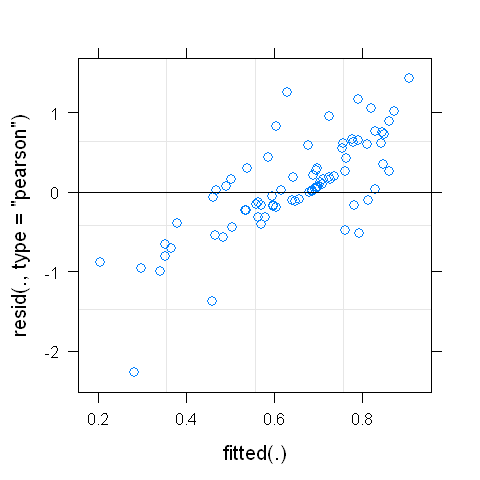

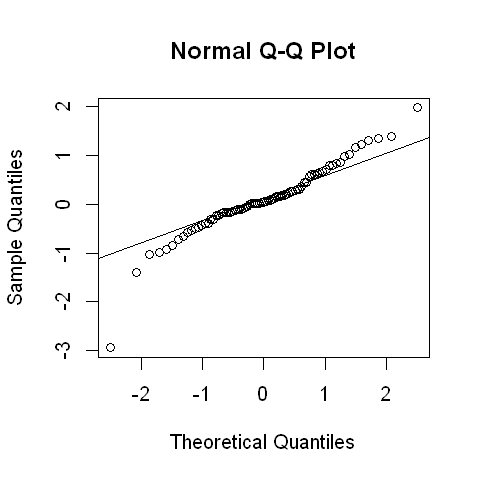

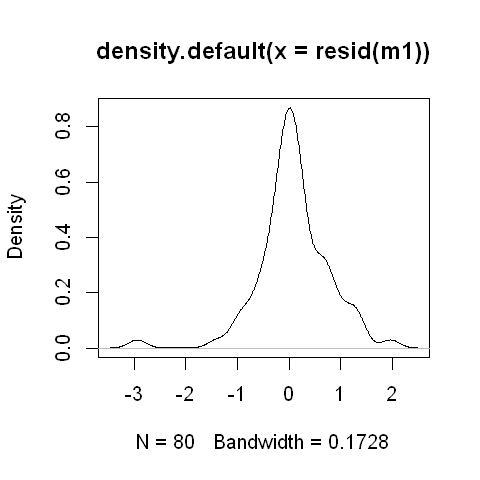

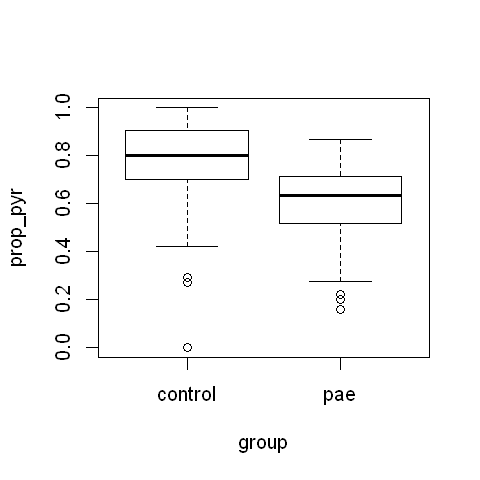

In [13]:
median(data[data$area=='ca1' & data$group=='control',]$prop_pyr)
median(data[data$area=='ca1' & data$group=='pae',]$prop_pyr)

m1 = glmer(prop_pyr ~ group + (1|rat/session), weights=total, data=data[data$area=='ca1',],family="binomial")
m1.null = glmer(prop_pyr ~ 1 + (1|rat/session), weights=total, data=data[data$area=='ca1',],family="binomial")

anova(m1.null, m1)  

summary(m1)
overdisp.glmer(m1)

options(repr.plot.width = 4, repr.plot.height = 4)

plot(m1)
qqnorm(resid(m1))
qqline(resid(m1))
plot(density(resid(m1)))

plot(prop_pyr ~ group, data = data[data$area == "ca1",])



[1] 0.1972222

[1] 0.3629268

,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
m1.null,3,497.4133,504.5594,-245.7066,491.4133,NA,NA,NA
m1,4,496.7670,506.2951,-244.3835,488.7670,2.646308,1,0.1037907


Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: prop_int ~ group + (1 | rat/session)
   Data: data[data$area == "ca1", ]
Weights: total

     AIC      BIC   logLik deviance df.resid 
   496.8    506.3   -244.4    488.8       76 

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-1.42541 -0.42789 -0.04577  0.18223  2.26547 

Random effects:
 Groups      Name        Variance Std.Dev.
 session:rat (Intercept) 0.3901   0.6246  
 rat         (Intercept) 0.2438   0.4938  
Number of obs: 80, groups:  session:rat, 80; rat, 10

Fixed effects:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -0.9204     0.2763  -3.331 0.000864 ***
grouppae      0.6753     0.3886   1.738 0.082281 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
         (Intr)
grouppae -0.704

Residual deviance: 38.105 on 76 degrees of freedom (ratio: 0.501)


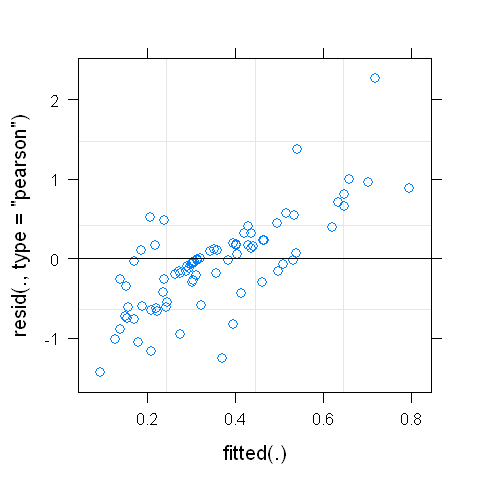

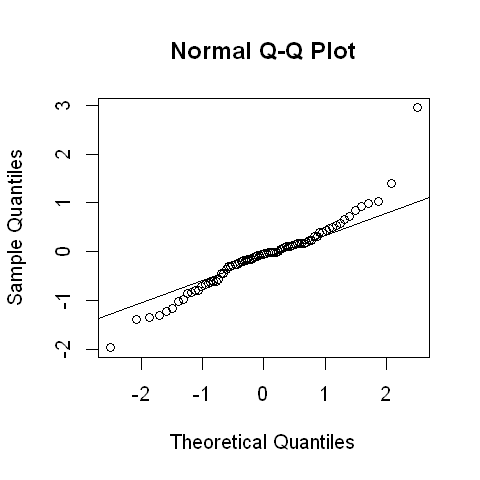

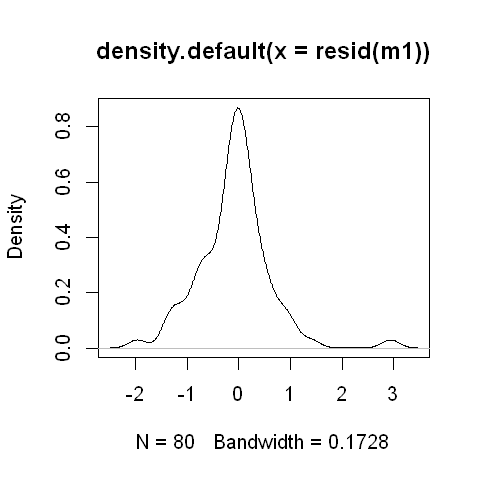

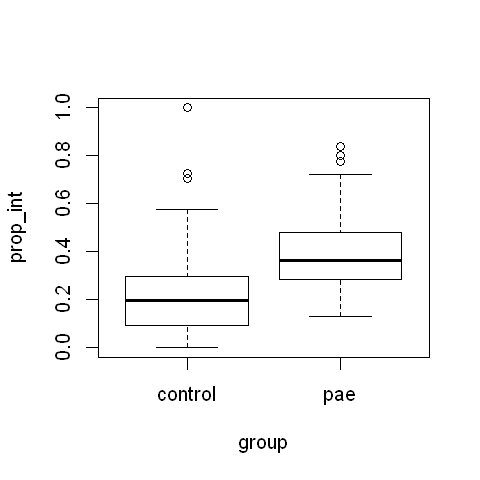

In [14]:
median(data[data$area=='ca1' & data$group=='control',]$prop_int)
median(data[data$area=='ca1' & data$group=='pae',]$prop_int)

m1 = glmer(prop_int ~ group + (1|rat/session), weights=total, data=data[data$area=='ca1',],family="binomial")
m1.null = glmer(prop_int ~ 1 + (1|rat/session), weights=total, data=data[data$area=='ca1',],family="binomial")

anova(m1.null, m1)  

summary(m1)
overdisp.glmer(m1)

options(repr.plot.width = 4, repr.plot.height = 4)

plot(m1)
qqnorm(resid(m1))
qqline(resid(m1))
plot(density(resid(m1)))

plot(prop_int ~ group, data = data[data$area == "ca1",])



[1] 0.7613277

[1] 0.6239316

,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
m1.null,3,827.8613,836.2978,-410.9306,821.8613,NA,NA,NA
m1,4,827.7433,838.9920,-409.8716,819.7433,2.118006,1,0.145576


Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: prop_pyr ~ group + (1 | rat/session)
   Data: data[data$area == "ca3", ]
Weights: total

     AIC      BIC   logLik deviance df.resid 
   827.7    839.0   -409.9    819.7      119 

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-1.36366 -0.21765  0.06279  0.22425  1.29923 

Random effects:
 Groups      Name        Variance Std.Dev.
 session:rat (Intercept) 0.6264   0.7915  
 rat         (Intercept) 0.2710   0.5206  
Number of obs: 123, groups:  session:rat, 123; rat, 8

Fixed effects:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)   1.0828     0.3017   3.589 0.000332 ***
grouppae     -0.7286     0.4395  -1.658 0.097370 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
         (Intr)
grouppae -0.689

Residual deviance: 39.466 on 119 degrees of freedom (ratio: 0.332)


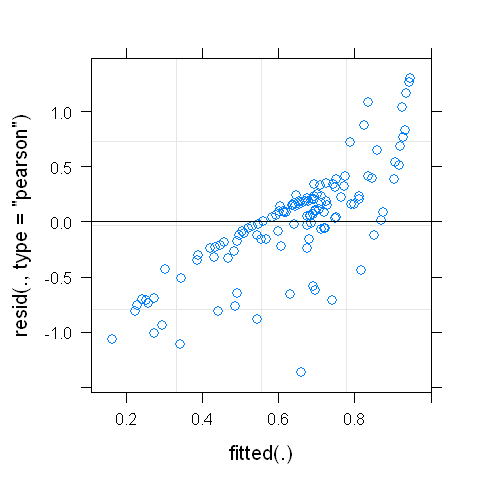

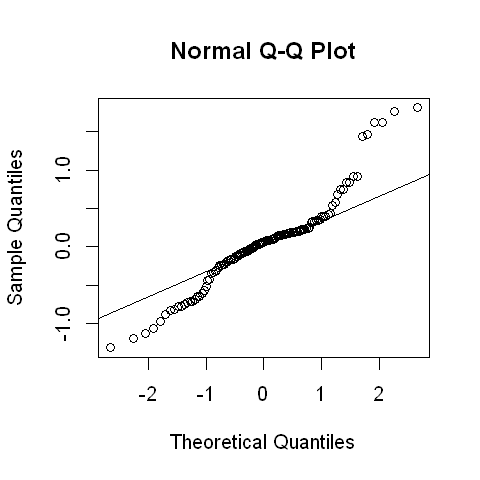

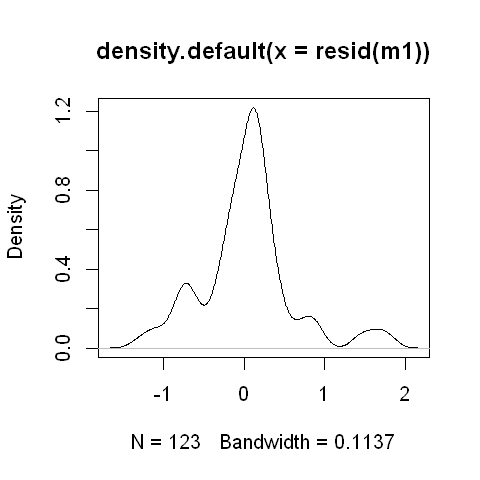

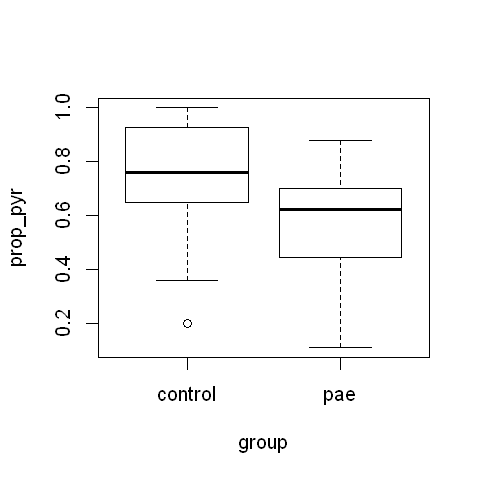

In [15]:
median(data[data$area=='ca3' & data$group=='control',]$prop_pyr)
median(data[data$area=='ca3' & data$group=='pae',]$prop_pyr)

m1 = glmer(prop_pyr ~ group + (1|rat/session), weights=total, data=data[data$area=='ca3',],family="binomial")
m1.null = glmer(prop_pyr ~ 1 + (1|rat/session), weights=total, data=data[data$area=='ca3',],family="binomial")

anova(m1.null, m1)  

summary(m1)
overdisp.glmer(m1)

options(repr.plot.width = 4, repr.plot.height = 4)

plot(m1)
qqnorm(resid(m1))
qqline(resid(m1))
plot(density(resid(m1)))

plot(prop_pyr ~ group, data = data[data$area == "ca3",])


[1] 0.2386723

[1] 0.3760684

,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
m1.null,3,827.8613,836.2978,-410.9306,821.8613,NA,NA,NA
m1,4,827.7433,838.9920,-409.8716,819.7433,2.118006,1,0.145576


Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: prop_int ~ group + (1 | rat/session)
   Data: data[data$area == "ca3", ]
Weights: total

     AIC      BIC   logLik deviance df.resid 
   827.7    839.0   -409.9    819.7      119 

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-1.29923 -0.22425 -0.06279  0.21765  1.36365 

Random effects:
 Groups      Name        Variance Std.Dev.
 session:rat (Intercept) 0.6264   0.7915  
 rat         (Intercept) 0.2710   0.5206  
Number of obs: 123, groups:  session:rat, 123; rat, 8

Fixed effects:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -1.0828     0.3017  -3.589 0.000332 ***
grouppae      0.7286     0.4395   1.658 0.097368 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
         (Intr)
grouppae -0.689

Residual deviance: 39.465 on 119 degrees of freedom (ratio: 0.332)


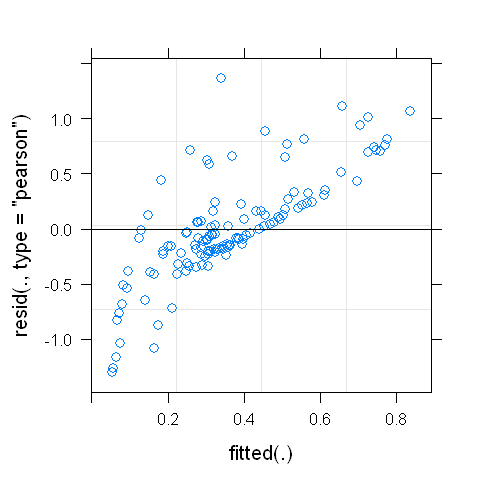

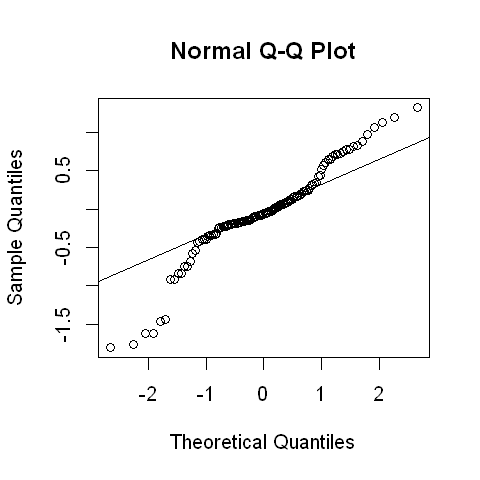

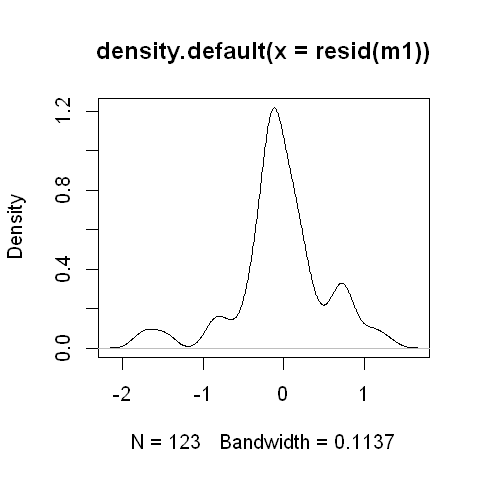

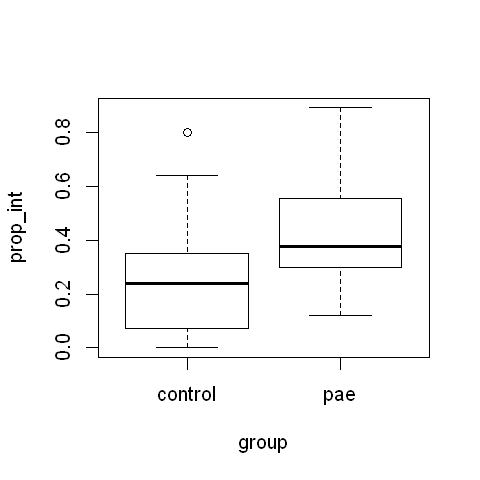

In [16]:
median(data[data$area=='ca3' & data$group=='control',]$prop_int)
median(data[data$area=='ca3' & data$group=='pae',]$prop_int)

m1 = glmer(prop_int ~ group + (1|rat/session), weights=total, data=data[data$area=='ca3',],family="binomial")
m1.null = glmer(prop_int ~ 1 + (1|rat/session), weights=total, data=data[data$area=='ca3',],family="binomial")

anova(m1.null, m1)  

summary(m1)
overdisp.glmer(m1)

options(repr.plot.width = 4, repr.plot.height = 4)

plot(m1)
qqnorm(resid(m1))
qqline(resid(m1))
plot(density(resid(m1)))

plot(prop_int ~ group, data = data[data$area == "ca3",])



# compare ripple phase modulation

In [21]:
data <- read.csv('F:/Projects/PAE_PlaceCell/analysis/ripple_modulation_phase/post_processed/df_prop.csv')
summary(data)

       X            n_pyr        n_pyr_pass        n_int        n_int_pass    
 Min.   : 0.0   Min.   : 4.0   Min.   : 2.00   Min.   : 0.0   Min.   : 0.000  
 1st Qu.:23.5   1st Qu.:24.0   1st Qu.:10.00   1st Qu.: 9.5   1st Qu.: 2.000  
 Median :47.0   Median :36.0   Median :18.00   Median :17.0   Median : 7.000  
 Mean   :47.0   Mean   :38.6   Mean   :19.65   Mean   :17.4   Mean   : 7.968  
 3rd Qu.:70.5   3rd Qu.:49.5   3rd Qu.:26.50   3rd Qu.:26.0   3rd Qu.:11.500  
 Max.   :94.0   Max.   :92.0   Max.   :60.00   Max.   :45.0   Max.   :35.000  
                                                                              
    prop_pyr          prop_int       area                       session  
 Min.   :0.04545   Min.   :0.0000   ca1:27   LEM3124_S20190307163732: 2  
 1st Qu.:0.38750   1st Qu.:0.3529   ca3:68   LEM3124_S20190309145324: 2  
 Median :0.51724   Median :0.5000            LEM3124_S20190315160017: 2  
 Mean   :0.50862   Mean   :0.4827            LEM3124_S20190319154019: 2 

In [22]:
data$groupup = factor(data$group, levels=c('control', 'pae'))
data$rat = factor(data$rat)
data$session = factor(data$session)
data$area = factor(data$area, levels=c('ca1', 'ca3'))

[1] 0.4578313

[1] 0.4821809

,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
m1.null,3,177.7160,181.6035,-85.85798,171.7160,NA,NA,NA
m1,4,179.4497,184.6330,-85.72484,171.4497,0.2662759,1,0.6058409


Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: prop_pyr ~ group + (1 | rat/session)
   Data: data[data$area == "ca1", ]
Weights: n_pyr

     AIC      BIC   logLik deviance df.resid 
   179.4    184.6    -85.7    171.4       23 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.3555 -0.1742  0.1373  0.3463  1.1040 

Random effects:
 Groups      Name        Variance Std.Dev.
 session:rat (Intercept) 0.2333   0.4830  
 rat         (Intercept) 0.3046   0.5519  
Number of obs: 27, groups:  session:rat, 27; rat, 6

Fixed effects:
            Estimate Std. Error z value Pr(>|z|)
(Intercept)  -0.1760     0.3983  -0.442    0.659
grouppae      0.3115     0.5833   0.534    0.593

Correlation of Fixed Effects:
         (Intr)
grouppae -0.645

Residual deviance: 8.006 on 23 degrees of freedom (ratio: 0.348)


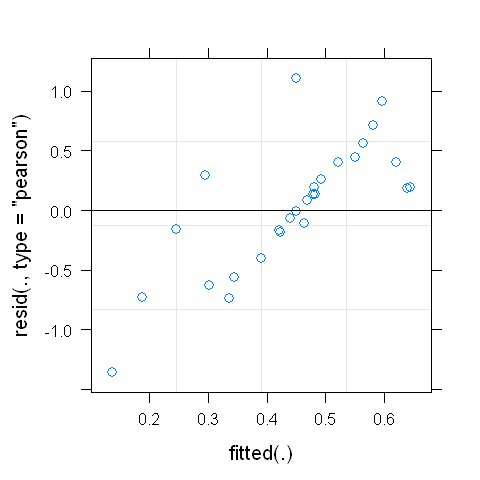

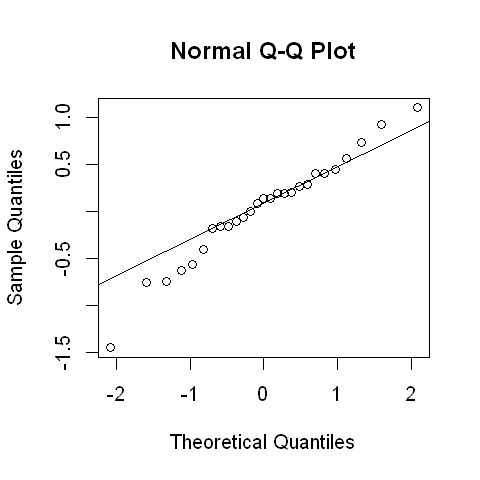

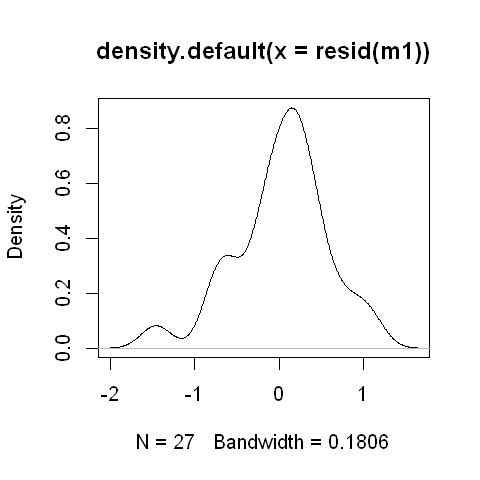

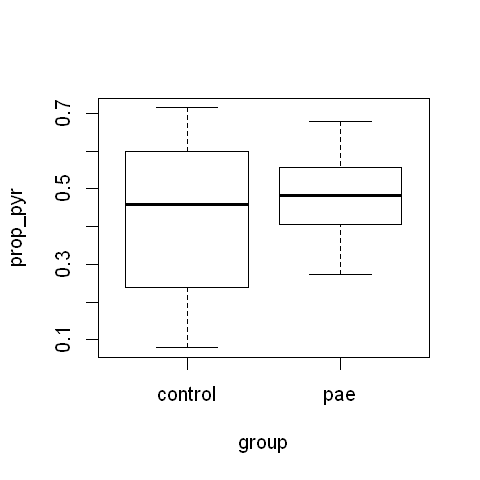

In [24]:
median(data[data$area=='ca1' & data$group=='control',]$prop_pyr)
median(data[data$area=='ca1' & data$group=='pae',]$prop_pyr)

m1 = glmer(prop_pyr ~ group + (1|rat/session), weights=n_pyr, data=data[data$area=='ca1',],family="binomial")
m1.null = glmer(prop_pyr ~ 1 + (1|rat/session), weights=n_pyr, data=data[data$area=='ca1',],family="binomial")

anova(m1.null, m1)  

summary(m1)
overdisp.glmer(m1)

options(repr.plot.width = 4, repr.plot.height = 4)

plot(m1)
qqnorm(resid(m1))
qqline(resid(m1))
plot(density(resid(m1)))

plot(prop_pyr ~ group, data = data[data$area == "ca1",])

[1] 0.1130952

[1] 0.4583333

Warning message in eval(family$initialize, rho):
"non-integer #successes in a binomial glm!"Warning message in eval(family$initialize, rho):
"non-integer #successes in a binomial glm!"

,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
m1.null,3,187.4422,191.2165,-90.72110,181.4422,NA,NA,NA
m1,4,188.4888,193.5212,-90.24441,180.4888,0.9533863,1,0.3288588


Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: prop_int ~ group + (1 | rat/session)
   Data: data[data$area == "ca1", ]
Weights: n_pyr

     AIC      BIC   logLik deviance df.resid 
   188.5    193.5    -90.2    180.5       22 

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-1.26430 -0.16533  0.00002  0.13061  1.36945 

Random effects:
 Groups      Name        Variance Std.Dev.
 session:rat (Intercept) 1.0066   1.0033  
 rat         (Intercept) 0.8729   0.9343  
Number of obs: 26, groups:  session:rat, 26; rat, 6

Fixed effects:
            Estimate Std. Error z value Pr(>|z|)  
(Intercept)  -1.4630     0.8334  -1.756   0.0792 .
grouppae      1.3407     1.1070   1.211   0.2258  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
         (Intr)
grouppae -0.731

Residual deviance: 11.861 on 22 degrees of freedom (ratio: 0.539)


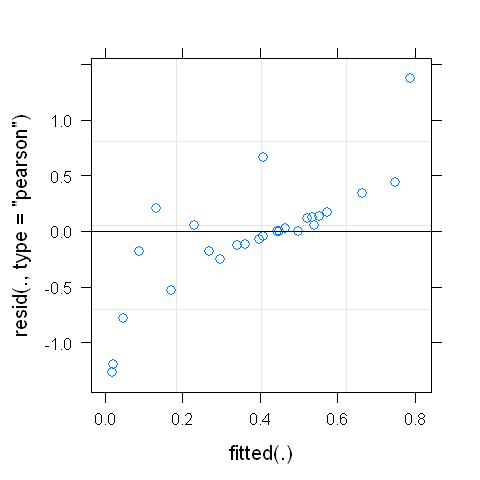

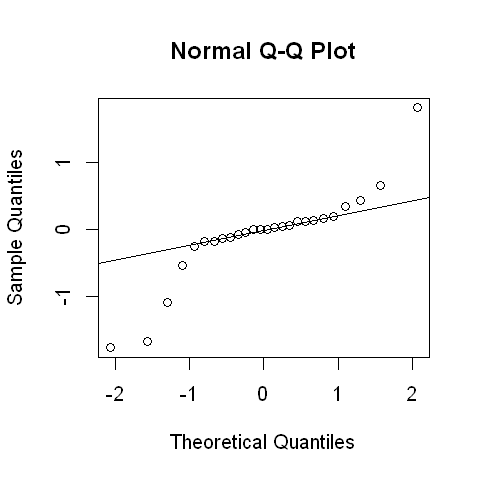

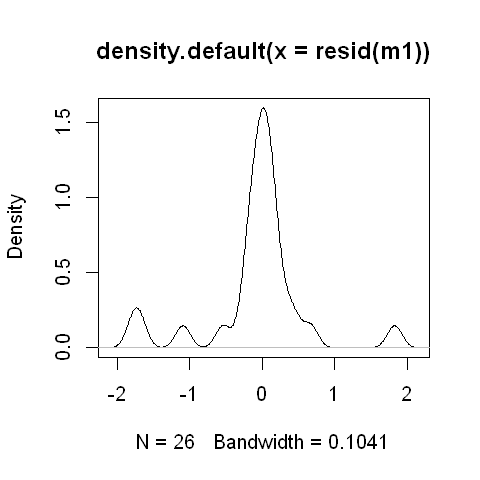

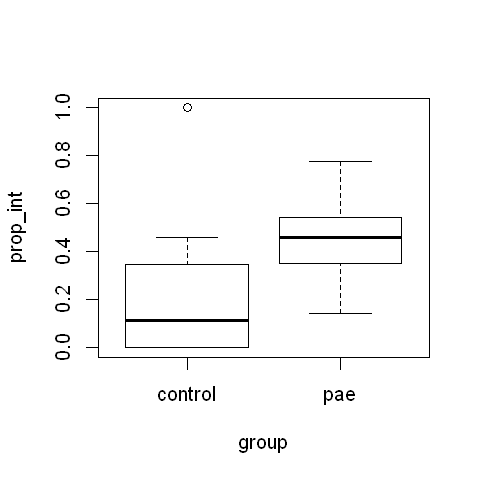

In [27]:
median(data[data$area=='ca1' & data$group=='control',]$prop_int,na.rm = TRUE)
median(data[data$area=='ca1' & data$group=='pae',]$prop_int)

m1 = glmer(prop_int ~ group + (1|rat/session), weights=n_pyr, data=data[data$area=='ca1',],family="binomial")
m1.null = glmer(prop_int ~ 1 + (1|rat/session), weights=n_pyr, data=data[data$area=='ca1',],family="binomial")

anova(m1.null, m1)  

summary(m1)
overdisp.glmer(m1)

options(repr.plot.width = 4, repr.plot.height = 4)

plot(m1)
qqnorm(resid(m1))
qqline(resid(m1))
plot(density(resid(m1)))

plot(prop_int ~ group, data = data[data$area == "ca1",])

[1] 0.5557598

[1] 0.6069444

,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
m1.null,3,435.5615,442.2200,-214.7808,429.5615,NA,NA,NA
m1,4,437.5611,446.4391,-214.7805,429.5611,0.0004439992,1,0.9831888


Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: prop_pyr ~ group + (1 | rat/session)
   Data: data[data$area == "ca3", ]
Weights: n_pyr

     AIC      BIC   logLik deviance df.resid 
   437.6    446.4   -214.8    429.6       64 

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-1.67465 -0.21990  0.02122  0.33295  1.11380 

Random effects:
 Groups      Name        Variance Std.Dev.
 session:rat (Intercept) 0.4317   0.657   
 rat         (Intercept) 0.1657   0.407   
Number of obs: 68, groups:  session:rat, 68; rat, 6

Fixed effects:
            Estimate Std. Error z value Pr(>|z|)
(Intercept) 0.131512   0.310084   0.424    0.671
grouppae    0.008566   0.405953   0.021    0.983

Correlation of Fixed Effects:
         (Intr)
grouppae -0.764

Residual deviance: 22.187 on 64 degrees of freedom (ratio: 0.347)


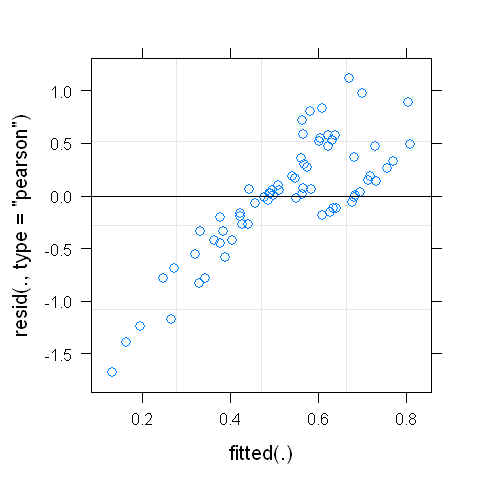

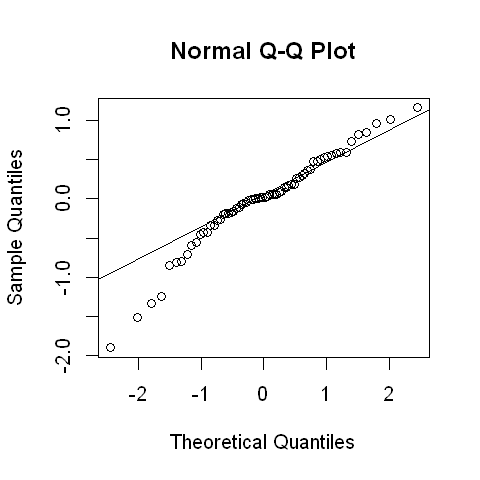

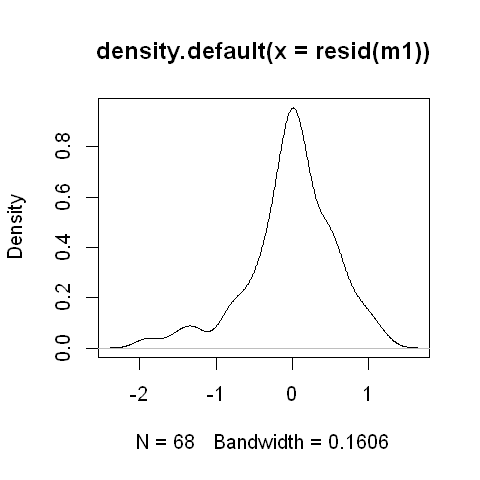

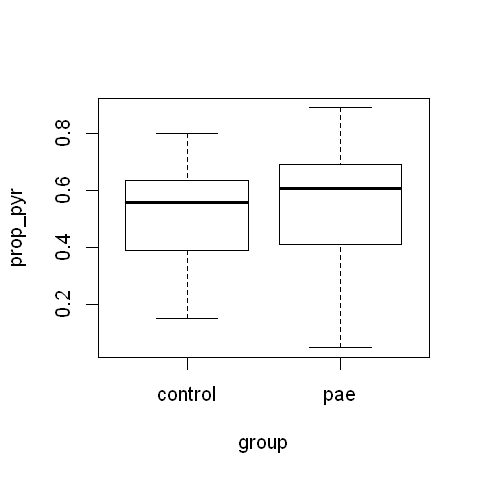

In [28]:
median(data[data$area=='ca3' & data$group=='control',]$prop_pyr)
median(data[data$area=='ca3' & data$group=='pae',]$prop_pyr)

m1 = glmer(prop_pyr ~ group + (1|rat/session), weights=n_pyr, data=data[data$area=='ca3',],family="binomial")
m1.null = glmer(prop_pyr ~ 1 + (1|rat/session), weights=n_pyr, data=data[data$area=='ca3',],family="binomial")

anova(m1.null, m1)  

summary(m1)
overdisp.glmer(m1)

options(repr.plot.width = 4, repr.plot.height = 4)

plot(m1)
qqnorm(resid(m1))
qqline(resid(m1))
plot(density(resid(m1)))

plot(prop_pyr ~ group, data = data[data$area == "ca3",])


[1] 0.5714286

[1] 0.5

Warning message in eval(family$initialize, rho):
"non-integer #successes in a binomial glm!"Warning message in eval(family$initialize, rho):
"non-integer #successes in a binomial glm!"

,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
m1.null,3,442.5726,449.0020,-218.2863,436.5726,NA,NA,NA
m1,4,444.0365,452.6091,-218.0183,436.0365,0.5361184,1,0.4640458


Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: prop_int ~ group + (1 | rat/session)
   Data: data[data$area == "ca3", ]
Weights: n_pyr

     AIC      BIC   logLik deviance df.resid 
   444.0    452.6   -218.0    436.0       59 

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-1.65663 -0.14581  0.00075  0.12101  1.42655 

Random effects:
 Groups      Name        Variance Std.Dev.
 session:rat (Intercept) 1.064    1.0316  
 rat         (Intercept) 0.116    0.3406  
Number of obs: 63, groups:  session:rat, 63; rat, 6

Fixed effects:
            Estimate Std. Error z value Pr(>|z|)
(Intercept)   0.3308     0.3618   0.914    0.361
grouppae     -0.3494     0.4449  -0.785    0.432

Correlation of Fixed Effects:
         (Intr)
grouppae -0.814

Residual deviance: 28.528 on 59 degrees of freedom (ratio: 0.484)


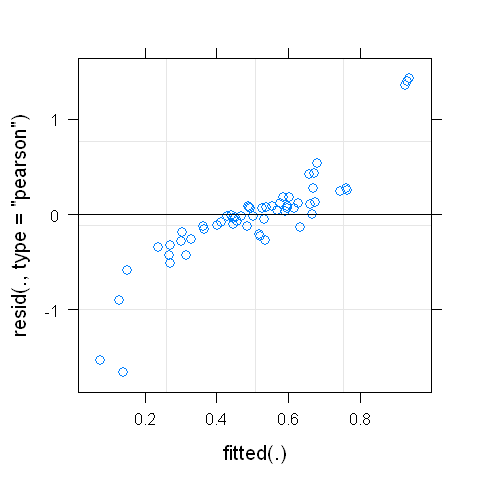

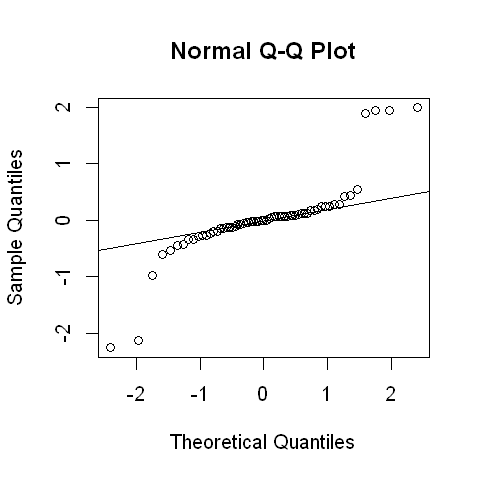

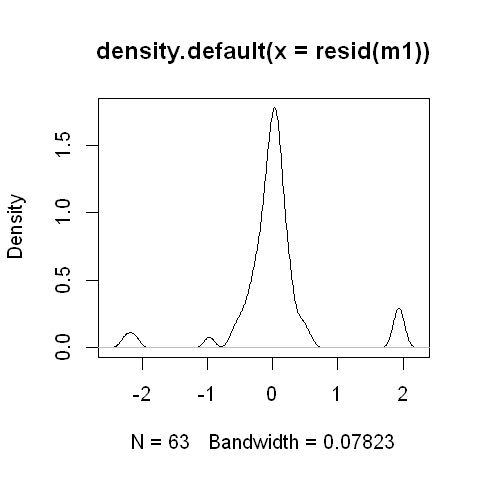

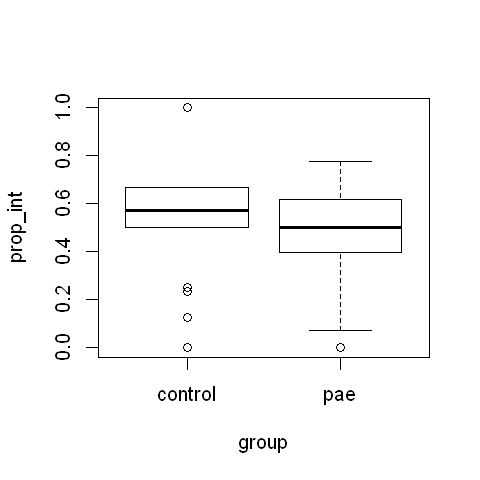

In [30]:
median(data[data$area=='ca3' & data$group=='control',]$prop_int,na.rm = TRUE)
median(data[data$area=='ca3' & data$group=='pae',]$prop_int)

m1 = glmer(prop_int ~ group + (1|rat/session), weights=n_pyr, data=data[data$area=='ca3',],family="binomial")
m1.null = glmer(prop_int ~ 1 + (1|rat/session), weights=n_pyr, data=data[data$area=='ca3',],family="binomial")

anova(m1.null, m1)  

summary(m1)
overdisp.glmer(m1)

options(repr.plot.width = 4, repr.plot.height = 4)

plot(m1)
qqnorm(resid(m1))
qqline(resid(m1))
plot(density(resid(m1)))

plot(prop_int ~ group, data = data[data$area == "ca3",])